In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
df = pd.read_pickle('./data/final_df')

In [7]:
def create_train_window(valores, group_size=20):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(0, len(valores)-group_size-1):
        if(i < (len(valores)-group_size-1)*0.8):
            x_train.append(valores[i:group_size+i])
            y_train.append(valores[i+group_size][-2])
        else:
            x_test.append(valores[i:group_size+i])
            y_test.append(valores[i+group_size][-2])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [8]:
x_train, y_train, x_test, y_test = create_train_window(np.array(df), 40)
input_shape_w=np.shape(x_train[0])
input_shape_w

(40, 38)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=10,            # Number of epochs with no improvement before stopping
    verbose=1,              # Verbosity level (1 for updates, 0 for silent)
    restore_best_weights=True  # Restore the best weights when stopping
)

In [10]:
#Creación MODELO
model = keras.Sequential()
model.add(layers.LSTM(256, input_shape=input_shape_w, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128, return_sequences=False, dropout=0, recurrent_dropout=0))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 256)           302080    
                                                                 
 dropout (Dropout)           (None, 40, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

In [11]:
model.fit(x_train, y_train, shuffle=True, batch_size=32, epochs=20, validation_split=0.3,callbacks=[early_stopping])

Epoch 1/20
150/150 [==============================] - 22s 129ms/step - loss: 1.6813 - accuracy: 0.1125 - val_loss: 1.1621 - val_accuracy: 0.1301
Epoch 2/20
150/150 [==============================] - 21s 139ms/step - loss: 1.4585 - accuracy: 0.1122 - val_loss: 1.0522 - val_accuracy: 0.1301
Epoch 3/20
150/150 [==============================] - 20s 133ms/step - loss: 1.3172 - accuracy: 0.1125 - val_loss: 1.0659 - val_accuracy: 0.1301
Epoch 4/20
150/150 [==============================] - 19s 126ms/step - loss: 1.2661 - accuracy: 0.1128 - val_loss: 1.0579 - val_accuracy: 0.1301
Epoch 5/20
150/150 [==============================] - 20s 133ms/step - loss: 1.2417 - accuracy: 0.1123 - val_loss: 1.1926 - val_accuracy: 0.1301
Epoch 6/20
150/150 [==============================] - 20s 131ms/step - loss: 1.2445 - accuracy: 0.1124 - val_loss: 1.0718 - val_accuracy: 0.1301
Epoch 7/20
150/150 [==============================] - 19s 129ms/step - loss: 1.1358 - accuracy: 0.1124 - val_loss: 1.0248 - val_ac

In [12]:
y_prediction = model.predict(x_test)
print(mean_absolute_error(y_test,y_prediction))
print(mean_squared_error(y_test,y_prediction))

108/108 [==============================] - 3s 22ms/step
0.7976282075455937
1.028247011512085


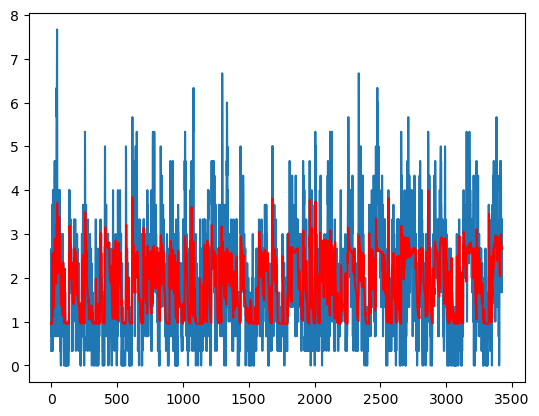

In [13]:
plt.plot(y_test)
plt.plot(y_prediction,c='r')